In [1]:
# Importar dependências
import gempy as gp
import gempy_viewer as gpv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../../3Dmodels/input/BES/interpreted_seismics/interim_data/"

Setting Backend To: AvailableBackends.numpy


## Step by step

In [2]:
# Initialize the model
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name="BES Seismic Interpretation V1",
    extent=[420000, 460000, 7770000, 7790000, -3500, 0],
    resolution=[30, 30, 30],
    importer_helper=gp.data.ImporterHelper(
        #path_to_orientations=data_path + "orientations_points_1_serie.csv",
        path_to_orientations=data_path + "orientation_points.csv",
        path_to_surface_points=data_path + "df_seis_gempy_format.csv",
    ),
)

# Assigning series to formations as well as their order (timewise)
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Sea_floor": ("h0"),
        "Strat_1": ("h1"),
        "Strat_2": ("h2"),
        "Strat_3": ("h3"),
        "Strat_4": ("h4"),
        #"Basement": ("basement",),
    },
)

# Plot 2D
gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=False, ve=5, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=False, ve=5, legend=True)

# Plot 3D
"""
gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=5,
    show_values=False,
    show_block=True,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()
"""

# Compute model
model = gp.compute_model(
    geo_model)

"""
# Compute model with GPU
model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte
        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)
        #dtype="float64", "float32"
    ))
    """

In [ ]:
# Results visualization
gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=True)

gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=5,
    show_lith=True,
    show_data=False,
    show_values=False,
    show_block=False,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

# Com Numpy: 
- GPU 12%, GPU 25%, RAM 50%.
- Tempo de processamento: 4m20s

# Salvando em pickle

In [9]:
import pickle

# Assuming 'model' is the result of gp.compute_model(geo_model)
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f) 

In [10]:
model.dc_meshes

[DualContouringMesh(1460 vertices, 5378 edges),
 DualContouringMesh(1391 vertices, 5161 edges),
 DualContouringMesh(1412 vertices, 5190 edges),
 DualContouringMesh(1457 vertices, 5368 edges),
 DualContouringMesh(1340 vertices, 4947 edges)]

# Primeiro plot pelo arquivo pickle

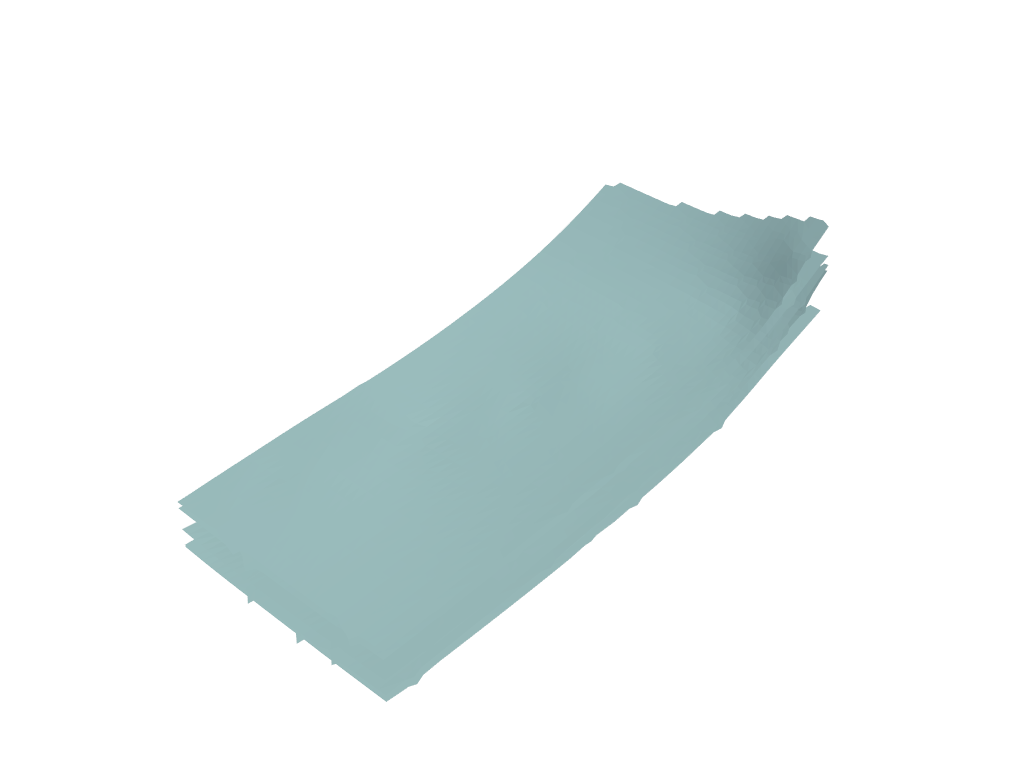

In [12]:
import pickle
import pyvista as pv
import numpy as np

# Load the model from the pickle file
with open('model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

# Create a PyVista plotter
plotter = pv.Plotter()

# Define the vertical exaggeration factor
vertical_exaggeration = 5.0  # Change this to your desired value

# Add the surfaces to the plotter
for surface in loaded_model.dc_meshes:
    # Create a PyVista PolyData object from the vertices and faces
    polydata = pv.PolyData(surface.vertices, np.hstack([np.full((len(surface.edges), 1), 3), surface.edges]))
    
    # Apply the vertical exaggeration
    polydata.points[:, 2] *= vertical_exaggeration

    plotter.add_mesh(polydata)

# Show the plot
plotter.show()

# Segunda imagem com o arquivo pickle, mas com mudança de cores

In [ ]:
import pickle
import pyvista as pv
import numpy as np

# Load the model from the pickle file
with open('model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

# Create a PyVista plotter
plotter = pv.Plotter()

# Define the vertical exaggeration factor
vertical_exaggeration = 5.0  # Change this to your desired value

# Define the colors for the layers
colors = ['red', 'green', 'blue', 'yellow', 'gray']  # Add more colors if you have more layers

# Add the surfaces to the plotter
for i, surface in enumerate(loaded_model.dc_meshes):
    # Create a PyVista PolyData object from the vertices and faces
    polydata = pv.PolyData(surface.vertices, np.hstack([np.full((len(surface.edges), 1), 3), surface.edges]))
    
    # Apply the vertical exaggeration
    polydata.points[:, 2] *= vertical_exaggeration

    # Create a surface from the points
    surface = polydata.delaunay_2d()

    # Add the surface to the plotter with the color of the layer
    plotter.add_mesh(surface, color=colors[i % len(colors)])

# Show the plot
plotter.show()

-  Como a extensão do modelo está normalizado, resolvi ligar essa normalização a extensão real do modelo, conforme feito no código abaixo.

In [13]:
# Define the extent of your model
extent = np.array([420000, 460000, 7770000, 7790000, -3500, 0])

# Define the normalized coordinates
normalized_coords = np.array([-0.3, 0.1, 0.1])  # x, y, z

# Convert the normalized coordinates back to the original coordinates
original_coords = extent[::2] + (normalized_coords + 1) / 2 * (extent[1::2] - extent[::2])

print(original_coords)

[ 4.340e+05  7.781e+06 -1.575e+03]


- Adicionando as coordenadas reais no modelo do pickle

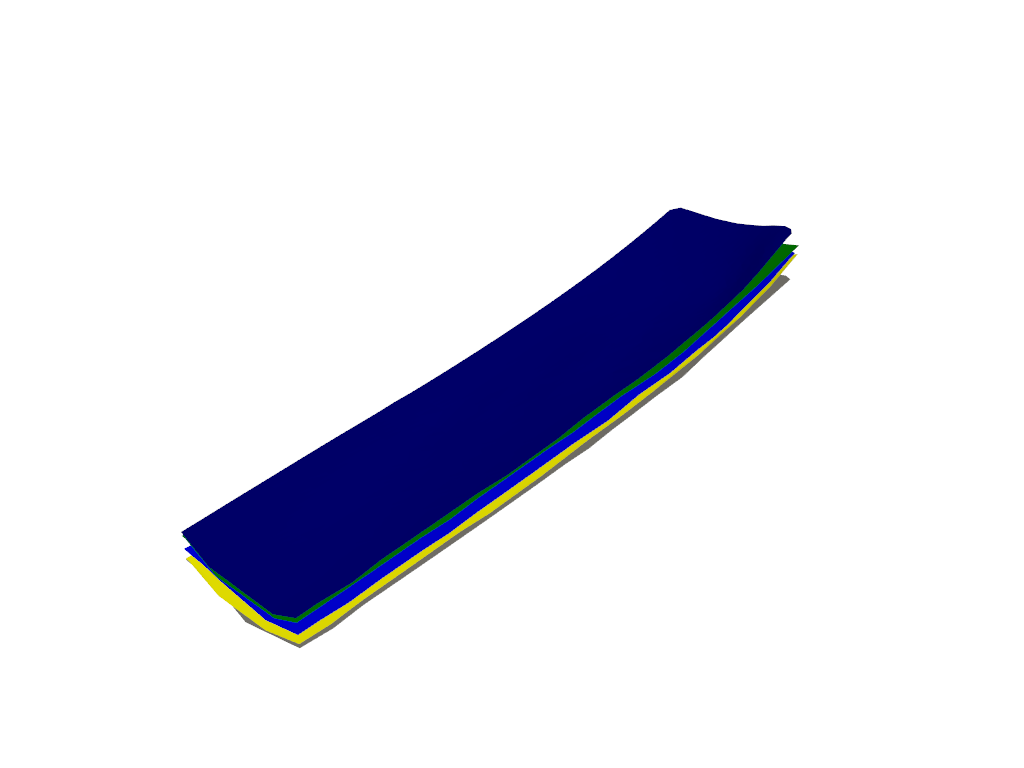

In [15]:
import pickle
import pyvista as pv
import numpy as np

# Load the model from the pickle file
with open('model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

# Create a PyVista plotter
plotter = pv.Plotter()

# Define the extent of your model
extent = np.array([420000, 460000, 7770000, 7790000, -3500, 0])

# Define the vertical exaggeration factor
vertical_exaggeration = 30.0  # Change this to your desired value

# Define the colors for the layers
colors = ['navy', 'green', 'blue', 'yellow', 'gray']  # Add more colors if you have more layers

# Add the surfaces to the plotter
for i, surface in enumerate(loaded_model.dc_meshes):
    # Create a PyVista PolyData object from the vertices and faces
    polydata = pv.PolyData(surface.vertices, np.hstack([np.full((len(surface.edges), 1), 3), surface.edges]))
    
    # Scale and translate the coordinates to match the extent of your model
    polydata.points = polydata.points * (extent[1::2] - extent[::2]) + extent[::2]

    # Apply the vertical exaggeration
    polydata.points[:, 2] *= vertical_exaggeration

    # Create a surface from the points
    surface = polydata.delaunay_2d()

    # Add the surface to the plotter with the color of the layer
    plotter.add_mesh(surface, color=colors[i % len(colors)])

# Show the plot
plotter.show()

- Adicionando legendas

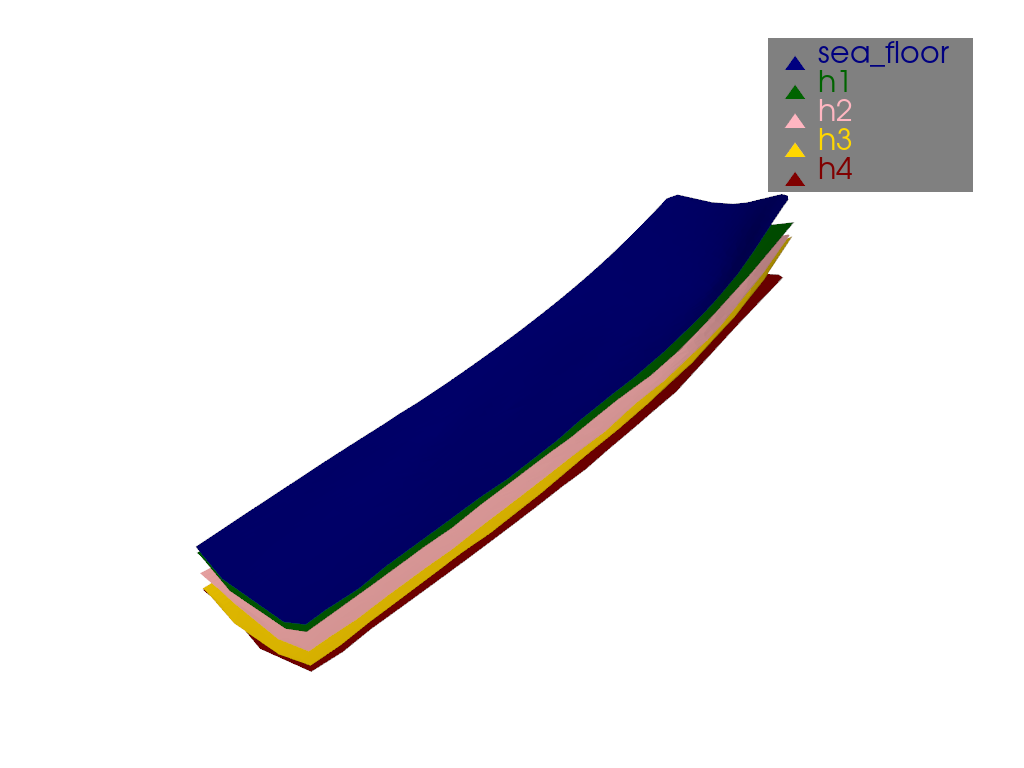

In [19]:
import pickle
import pyvista as pv
import numpy as np

# Load the model from the pickle file
with open('model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

# Create a PyVista plotter
plotter = pv.Plotter()

# Define the extent of your model
extent = np.array([420000, 460000, 7770000, 7790000, -3500, 0])

# Define the vertical exaggeration factor
vertical_exaggeration = 50  # Change this to your desired value

# Define the colors for the layers
colors = ['navy', 'darkgreen', 'lightpink', 'gold', 'maroon']  # Add more colors if you have more layers

# Define the names for the layers
names = ['sea_floor', 'h1', 'h2', 'h3', 'h4']  # Add more names if you have more layers

# Add the surfaces to the plotter
for i, surface in enumerate(loaded_model.dc_meshes):
    # Create a PyVista PolyData object from the vertices and faces
    polydata = pv.PolyData(surface.vertices, np.hstack([np.full((len(surface.edges), 1), 3), surface.edges]))
    
    # Scale and translate the coordinates to match the extent of your model
    polydata.points = polydata.points * (extent[1::2] - extent[::2]) + extent[::2]

    # Apply the vertical exaggeration
    polydata.points[:, 2] *= vertical_exaggeration

    # Create a surface from the points
    surface = polydata.delaunay_2d()

    # Add the surface to the plotter with the color of the layer and the name of the layer
    plotter.add_mesh(surface, color=colors[i % len(colors)], label=names[i % len(names)])

# Add a legend to the plot
plotter.add_legend()

# Show the plot
plotter.show()

In [35]:
print(dir(model))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_raw_arrays', '_repr_html_', 'dc_meshes', 'debug_input_data', 'gravity', 'magnetics', 'meshes_to_unstruct', 'octrees_output', 'raw_arrays']


In [99]:
print(type(loaded_model))  # Print the type of the object
print(loaded_model)  # Print the object itself

<class 'gempy_engine.core.data.solutions.Solutions'>
Solutions(1 Octree Levels, 5 DualContouringMeshes)


In [100]:
print(dir(loaded_model))  # Print the attributes and methods of the object

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_raw_arrays', '_repr_html_', 'dc_meshes', 'debug_input_data', 'gravity', 'magnetics', 'meshes_to_unstruct', 'octrees_output', 'raw_arrays']


# Salvando em netcdf

- Adiconei também a extensão e o nome das superficies no arquivo netcdf

In [ ]:
import xarray as xr
import numpy as np

# Extract the vertices and edges from the dc_meshes attribute
data = [{'vertices': np.array(mesh.vertices), 'edges': np.array(mesh.edges)} for mesh in loaded_model.dc_meshes]

# Find the maximum number of vertices and edges
max_vertices = max(mesh['vertices'].shape[0] for mesh in data)
max_edges = max(mesh['edges'].shape[0] for mesh in data)

# Pad the vertices and edges arrays with NaNs and -1s
for mesh in data:
    pad_vertices = max_vertices - mesh['vertices'].shape[0]
    pad_edges = max_edges - mesh['edges'].shape[0]
    mesh['vertices'] = np.pad(mesh['vertices'], ((0, pad_vertices), (0, 0)), 'constant', constant_values=np.nan)
    mesh['edges'] = np.pad(mesh['edges'], ((0, pad_edges), (0, 0)), 'constant', constant_values=-1)

# Create separate DataArrays for the vertices and edges of each mesh
vertices = xr.DataArray([mesh['vertices'] for mesh in data], dims=['mesh', 'vertex', 'coordinate'])
edges = xr.DataArray([mesh['edges'] for mesh in data], dims=['mesh', 'edge', 'vertex_index'])

# Combine the DataArrays into a Dataset
ds = xr.Dataset({'vertices': vertices, 'edges': edges})

# Define the extent of your model
extent = np.array([420000, 460000, 7770000, 7790000, -3500, 0])

# Add the extent as an attribute to the Dataset
ds.attrs['extent'] = extent.tolist()

# Define the names for the layers
names = ['sea_floor', 'h1', 'h2', 'h3', 'h4']  # Add more names if you have more layers

# Join the names into a single string with a comma as a separator
names_str = ','.join(names)

# Add the names as an attribute to the Dataset
ds.attrs['surface_names'] = names_str

# Save the Dataset to a NetCDF file
ds.to_netcdf('model.nc')

- Plot pelo netcdf

In [122]:
import xarray as xr
import pyvista as pv
import numpy as np

# Load the model from the NetCDF file
ds = xr.load_dataset('model.nc')

# Create a PyVista plotter
plotter = pv.Plotter()

# Get the extent of your model
extent = np.array(ds.attrs['extent'])

# Define the vertical exaggeration factor
vertical_exaggeration = 30.0  # Change this to your desired value

# Define the colors for the layers
colors = ['navy', 'darkgreen', 'lightpink', 'gold', 'maroon']  # Add more colors if you have more layers

# Get the names of the surfaces and split the string back into a list
names = ds.attrs['surface_names'].split(',')

# Add the surfaces to the plotter
for i in range(len(ds.mesh)):
    # Get the vertices and edges for this mesh
    vertices = ds.vertices[i].dropna('vertex').values
    edges = ds.edges[i].dropna('edge').values.astype(int)

    # Create a PyVista PolyData object from the vertices and faces
    polydata = pv.PolyData(vertices, np.hstack([np.full((len(edges), 1), 3), edges]))
    
    # Scale and translate the coordinates to match the extent of your model
    polydata.points = polydata.points * (extent[1::2] - extent[::2]) + extent[::2]

    # Apply the vertical exaggeration
    polydata.points[:, 2] *= vertical_exaggeration

    # Create a surface from the points
    surface = polydata.delaunay_2d()

    # Add the surface to the plotter with the color of the layer and the name of the layer
    plotter.add_mesh(surface, color=colors[i % len(colors)], label=names[i % len(names)])

# Add a legend to the plot
plotter.add_legend()

# Show the plot
plotter.show()

Widget(value="<iframe src='http://localhost:59408/index.html?ui=P_0x23a730d5330_34&reconnect=auto' style='widt…

In [75]:
dir(model)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_raw_arrays',
 '_repr_html_',
 'dc_meshes',
 'debug_input_data',
 'gravity',
 'magnetics',
 'meshes_to_unstruct',
 'octrees_output',
 'raw_arrays']